# Ridge and Lasso Regression

## SWBAT Implement a regularize regression model to help improve the performance of their model on a test set of data.

### Key Questions:

* When should you use a regularized model instead of a normal model?

* How do regularized models differ from normal linear regression?

* How does a Ridge model differ from a Lasso Model?

## Recap of Overfiting a model

![alt text](bias-variance-train-test-error.png)

#### Two common (and somewhat related) ways to think of model complexity:

1. Model complexity as a function of the total number of features with nonzero weights. 

*The more features the more complex the model.*

2. Model complexity as a function of the weights of all the features in the model. 

*The bigger the weights of the features (coefficients) the more complex the model.*


#### How does model complexity change with coefficients?

Recall the way we interpret a regression model $Y = mx + b$: 

With every unit increase in x, the outcome y increase by m unit. Therefore, the bigger the coefficient m is, the more the outcome is subjected to changes in predictor x.

### Cost Function

A cost function is a measure of how good or bad the model is at estimating the relationship of our X and y variables. Usually, it is expressed in the difference between actual values and predicted values. When fitting a model to data, the model finds the coeeficients that will minimize the cost fuction. 

For simple linear regression, the cost function is represented as:
<center> $$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (mx_i + b))^2$$
    
    
For linear regression with multiple predictors, the cost function is expressed as:
$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n\left(y_i - \sum_{j=1}^k(m_jx_{ij} + b)\right)^2$$

Where k stands for number of predictors at jth term.

### Hyperparameter tuning

A model **hyperparameter** is a configuration that is external to the model and whose value cannot be estimated from data.


- They are often used in processes to help estimate model parameters.
- They are often specified by the practitioner.
- They can often be set using heuristics.
- They are often tuned for a given predictive modeling problem.

## Ridge Rgression (L2 Norm)

The ridge regression applies a penalizing parameter $\lambda$ *slope* $^2$, such that a small bias will be introduced to the entire model depending on the value of $\lambda$, which is called a **hyperparameter**. 

$$ \text{Ridge Cost Function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n\left(y_i - \sum_{j=1}^k(m_jx_{ij} + b)\right)^2 + \lambda \sum_{j=1}^p m_j^2$$

The ridge regression penalty term contains all of the coefficients squared from the original regression line except for the intercept term. 

Applying such a penalizing parameter to the cost function, the regression model will now try to minimize the combination of both the residual sum of squares **and** the term $\lambda \sum_{j=1}^p m_j^2$. 

Ridge regression works by reducing the magnitude of the coefficient m and therefore reducing the effect the predictors have on the outcome. 

**Ridge regression shrinks the coefficients and it helps to reduce the model complexity**

## Lasso Regression (L1 Norm)
Lasso *(least absolute shrinkage and selection operator)* regression is very similar to Ridge regression except for one difference - the penalty term is not squared but the absolute values of the coefficients muliplied by lambda, expressed by:

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n\left(y_i - \sum_{j=1}^k(m_jx_{ij} + b)\right)^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

The biggest difference in Ridge and Lasso is that Lasso simultaneously performs variable selection: some coefficients are shrunk to 0, rendering them nonexistence in the original regression model. Therefore, Lasso regression performs very well when you have higher dimensional dataset where some predictors are useless; whereas Ridge works best when all the predictors are needed. 

### Choosing the approriate $\lambda$

When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit:

* If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.

* If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

### Typical Use Cases
- Ridge: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
- Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

### Presence of Highly Correlated Features
- Ridge: It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.
- Lasso: It arbitrarily **(?!)** selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly **(not random, but with complexity outside of intuition)** with change in model parameters. This generally doesn’t work that well as compared to ridge regression.

In [25]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
pd.set_option('display.max_columns', 300)


### Import our data 

In [26]:
df = pd.read_csv('kc_house_data.csv',index_col='id')
df['yr_old']=2017 - df['yr_built']



In [27]:
target = df.price
features = df.drop(['price','date','zipcode'],  axis=1 )
columns =  features.columns

In [28]:
columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old'],
      dtype='object')

### Create Test Train Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(17290, 18) (17290,)
(4323, 18) (4323,)


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scalar = StandardScaler()

scalar.fit(X_train)


/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
X_train_scaled  = scalar.transform(X_train)

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [33]:
lm = LinearRegression()
lm.fit(X_train_scaled,y_train)
y_train_pred = lm.predict(X_train_scaled)

In [34]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error:' , train_rmse)

Root Mean Squared Error: 193744.61489167687


In [35]:
X_test_scaled = scalar.transform(X_test)

/Users/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [36]:
y_test_pred = lm.predict(X_test_scaled)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))


Root Mean Squared Error:236376.45280186893


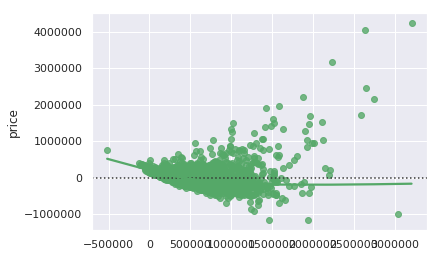

In [37]:
import seaborn as sns
sns.set(style="darkgrid")

#residual plot

sns.residplot(y_test_pred, y_test, lowess=True, color="g")

In [38]:
lm.coef_

array([-3.35259442e+04,  2.96272428e+04, -8.12372775e+18,  8.43855843e+03,
        8.56976237e+03,  5.07545483e+04,  3.47287437e+04,  2.25111596e+04,
        1.15556129e+05,  7.34538528e+18,  3.93240216e+18, -1.33586960e+18,
        9.54878610e+03,  7.95924806e+04, -1.48000135e+04,  2.54011848e+04,
       -1.15823393e+04, -1.33586960e+18])

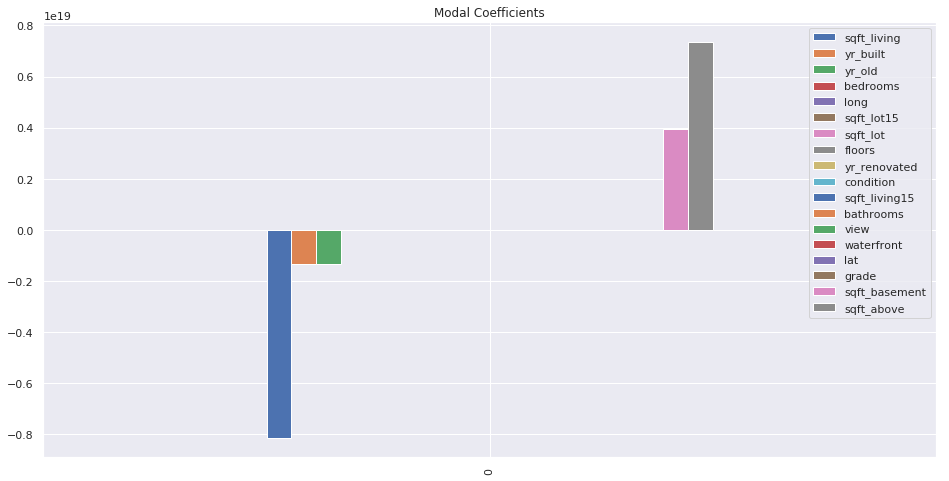

In [39]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(16,8))

In [40]:
model_coef.T

,0
sqft_living,-8.123728e+18
yr_built,-1.335870e+18
yr_old,-1.335870e+18
bedrooms,-3.352594e+04
long,-1.480001e+04
sqft_lot15,-1.158234e+04
sqft_lot,8.438558e+03
floors,8.569762e+03
yr_renovated,9.548786e+03
condition,2.251116e+04


In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_2.fit(X_train)
X_train_2= pd.DataFrame(poly_2.transform(X_train), columns=poly_2.get_feature_names(columns))

columns_2  = poly_2.get_feature_names(columns)

In [42]:
X_train_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_old,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms yr_renovated,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms yr_old,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms yr_old,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living yr_old,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot yr_old,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors yr_old,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,waterfront yr_old,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view lat,view long,view sqft_living15,view sqft_lot15,view yr_old,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition lat,condition long,condition sqft_living15,condition sqft_lot15,condition yr_old,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade lat,grade long,grade sqft_living15,grade sqft_lot15,grade yr_old,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above yr_old,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement yr_old,yr_built^2,yr_built yr_renovated,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_built yr_old,yr_renovated^2,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated yr_old,lat^2,lat long,lat sqft_living15,lat sqft_lot15,lat yr_old,long^2,long sqft_living15,long sqft_lot15,long yr_old,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 yr_old,sqft_lot15^2,sqft_lot15 yr_old,yr_old^2
0,5.0,2.75,3090.0,19865.0,1.0,0.0,0.0,4.0,9.0,3090.0,0.0,1953.0,0.0,47.6232,-122.235,2970.0,19862.0,64.0,25.0,13.75,15450.0,99325.0,5.0,0.0,0.0,20.0,45.0,15450.0,0.0,9765.0,0.0,238.1160,-611.175,14850.0,99310.0,320.0,7.5625,8497.5,54628.75,2.75,0.0,0.0,11.00,24.75,8497.5,0.0,5370.75,0.0,130.963800,-336.14625,8167.5,54620.50,176.00,9548100.0,61382850.0,3090.0,0.0,0.0,12360.0,27810.0,9548100.0,0.0,6034770.0,0.0,147155.688,-377706.15,9177300.0,61373580.0,197760.0,394618225.0,19865.0,0.0,0.0,79460.0,178785.0,61382850.0,0.0,38796345.0,0.0,946034.8680,-2428198.275,58999050.0,394558630.0,1271360.0,1.0,0.0,0.0,4.0,9.0,3090.0,0.0,1953.0,0.0,47.6232,-122.235,2970.0,19862.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,16.0,36.0,1

In [43]:
scalar_2 = StandardScaler()

scalar_2.fit(X_train_2)
X_train_2_scaled  = scalar_2.transform(X_train_2)

In [44]:
lm2 = LinearRegression()
model2 = lm2.fit(X_train_2_scaled, y_train)
y_train_2_pred = lm2.predict(X_train_2_scaled)

train_2_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_2_pred))

In [45]:
X_test_2= pd.DataFrame(poly_2.transform(X_test), columns=poly_2.get_feature_names(columns))
X_test_2_scaled = scalar_2.transform(X_test_2)

In [46]:

y_test_pred_2 = lm2.predict(X_test_2_scaled)

test_2_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_2))

# test2_mae = metrics.mean_absolute_error(y_test2, y_pred2)

print(train_2_rmse, test_2_rmse)


154852.0495393229 175555.7128132975


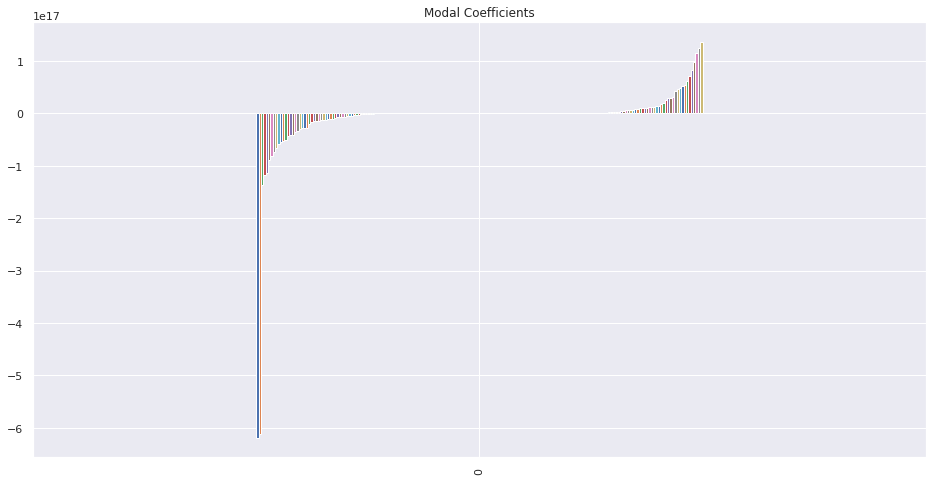

In [47]:
coef2 = pd.DataFrame(data=lm2.coef_ ).T
coef2.columns = X_train_2.columns

model_coef2 = coef2.T.sort_values(by=0).T
model_coef2.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [49]:
model_coef2.T

,0
lat yr_old,-6.184400e+17
yr_built lat,-6.116789e+17
floors yr_built,-1.360826e+17
long yr_old,-1.177929e+17
yr_built long,-1.143009e+17
view sqft_above,-8.895829e+16
bedrooms yr_built,-8.043431e+16
sqft_above^2,-7.294110e+16
sqft_above sqft_basement,-6.560715e+16
waterfront,-5.764784e+16


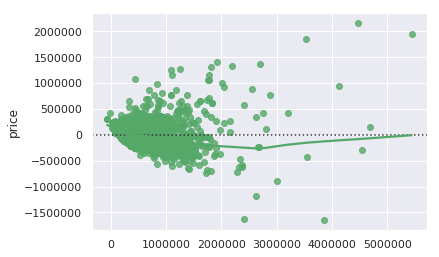

In [50]:
sns.residplot(y_test_pred_2, y_test, lowess=True, color="g")

## Training a Ridge Model 

In [51]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.1, normalize=True)

ridgeReg.fit(X_train_2_scaled, y_train)

y_pred_ridge = ridgeReg.predict(X_test_2_scaled)

#calculating rmse
RMSE_R01 =np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('Test RMSE:', RMSE_R01)

Test RMSE: 194532.9994558969


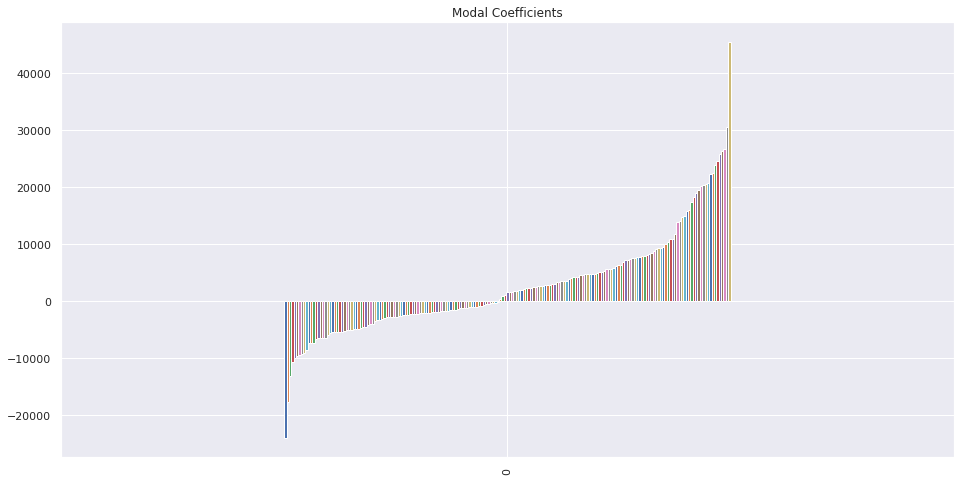

In [52]:
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
ridge_coef_01 = pd.DataFrame(data=ridgeReg.coef_).T
ridge_coef_01.columns = X_test_2.columns
ridge_coef_01 = ridge_coef_01.T.sort_values(by=0).T
ridge_coef_01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [54]:
ridge_coef_01.T

,0
lat long,-23876.998157
sqft_basement^2,-17708.568305
floors sqft_living15,-13016.982265
bathrooms yr_old,-10618.719785
bedrooms sqft_basement,-9988.417667
grade long,-9556.727200
sqft_living sqft_lot15,-9397.281172
sqft_above sqft_lot15,-9251.437375
sqft_lot yr_old,-9036.334478
yr_renovated yr_old,-8619.100021


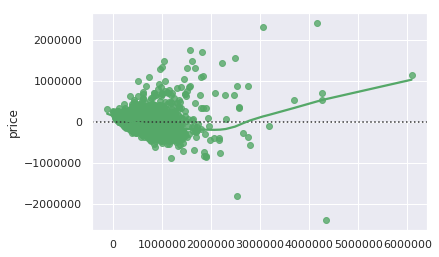

In [55]:
sns.residplot(y_pred_ridge, y_test, lowess=True, color="g")

In [56]:
ridgeReg_1 = Ridge(alpha=1, normalize=True)

ridgeReg_1.fit(X_train_2_scaled, y_train)

y_pred_ridge = ridgeReg_1.predict(X_test_2_scaled)

#calculating rmse
RMSE_R1 =np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))
print('Test RMSE:', RMSE_R1)


Test RMSE: 212278.1856661559


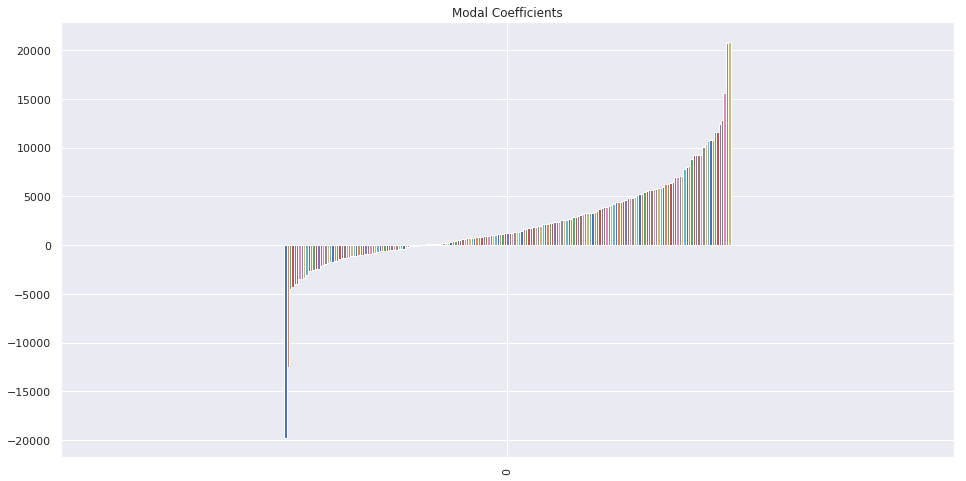

In [57]:


ridge_coef_1 = pd.DataFrame(data=ridgeReg_1.coef_).T
ridge_coef_1.columns = X_test_2.columns
ridge_coef_1 = ridge_coef_1.T.sort_values(by=0).T
ridge_coef_1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [58]:
ridge_coef_1.T

,0
lat long,-19733.063476
grade long,-12476.166807
bedrooms yr_built,-4469.708482
bedrooms,-4269.694746
bedrooms lat,-4004.658662
sqft_lot sqft_basement,-3964.585704
sqft_above long,-3516.759673
sqft_basement sqft_lot15,-3506.930464
long,-3395.460227
sqft_living long,-3103.111831


RMSE: 234475.7914543088


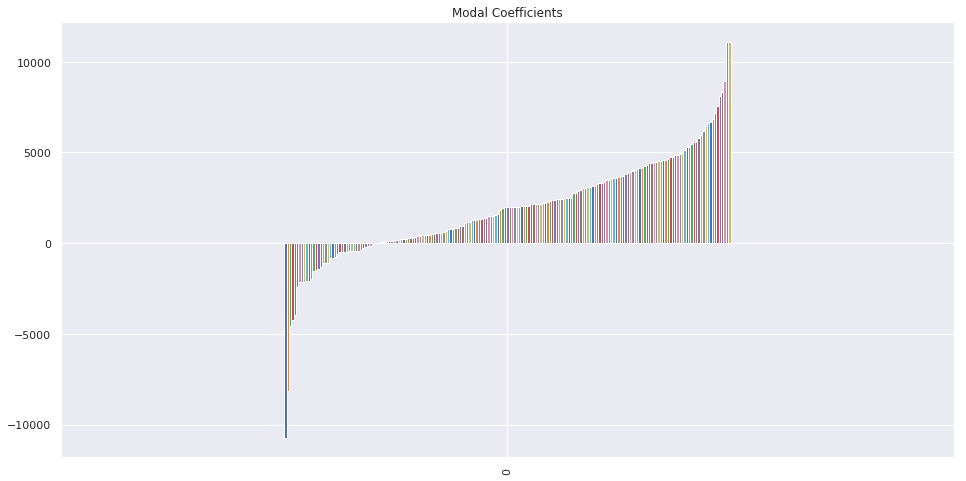

In [59]:
## training the model

ridgeReg_5 = Ridge(alpha=5, normalize=True)

ridgeReg_5.fit(X_train_2_scaled, y_train)

y_pred_ridge = ridgeReg_5.predict(X_test_2_scaled)

#calculating rmse
RMSE_R5 =np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

# print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', RMSE_R5)
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
ridge_coef_5 = pd.DataFrame(data=ridgeReg_5.coef_).T
ridge_coef_5.columns = X_test_2.columns
ridge_coef_5 = ridge_coef_5.T.sort_values(by=0).T
ridge_coef_5.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [60]:
ridge_coef_5

,lat long,grade long,sqft_living long,sqft_above long,long sqft_living15,long,view long,long yr_old,yr_built,yr_built^2,bathrooms long,waterfront long,bedrooms yr_built,sqft_basement long,bedrooms,bedrooms lat,floors long,sqft_basement sqft_lot15,sqft_lot sqft_basement,sqft_lot15 yr_old,bedrooms sqft_lot15,condition long,bedrooms^2,condition sqft_lot15,yr_renovated sqft_lot15,sqft_lot yr_renovated,bedrooms condition,yr_renovated long,floors sqft_lot15,sqft_lot15,yr_built sqft_lot15,lat sqft_lot15,sqft_lot yr_old,bathrooms sqft_lot15,bedrooms sqft_lot,sqft_lot long,view sqft_lot15,sqft_lot15^2,sqft_living sqft_lot15,sqft_living15 sqft_lot15,sqft_lot condition,yr_built lat,yr_renovated yr_old,grade sqft_lot15,sqft_lot waterfront,waterfront yr_renovated,sqft_lot,sqft_lot lat,sqft_lot yr_built,sqft_lot view,waterfront sqft_lot15,sqft_lot floors,bathrooms sqft_lot,sqft_above sqft_lot15,condition yr_renovated,waterfront yr_old,sqft_lot sqft_lot15,bedrooms floors,long sqft_lot15,yr_renovated,yr_renovated lat,yr_built yr_renovated,yr_renovated^2,sqft_lot sqft_living15,sqft_living sqft_lot,sqft_lot^2,floors yr_renovated,condition yr_built,sqft_lot grade,view yr_renovated,condition,sqft_lot sqft_above,condition^2,bedrooms yr_renovated,condition lat,floors yr_built,floors,floors lat,bedrooms sqft_basement,floors^2,bedrooms bathrooms,view yr_old,grade yr_renovated,bathrooms yr_renovated,sqft_basement yr_old,bedrooms long,sqft_basement yr_built,sqft_basement,sqft_basement lat,condition sqft_basement,bedrooms yr_old,floors condition,sqft_basement^2,bathrooms yr_built,waterfront^2,waterfront,waterfront condition,yr_built long,waterfront lat,waterfront view,waterfront yr_built,sqft_above yr_renovated,yr_built yr_old,bathrooms,yr_old,view,bathrooms lat,lat yr_old,view yr_built,view lat,yr_renovated sqft_living15,condition yr_old,sqft_living yr_renovated,bathrooms floors,view condition,view^2,long^2,sqft_basement yr_renovated,bedrooms sqft_living15,floors waterfront,bedrooms view,bathrooms condition,bathrooms yr_old,floors view,bedrooms waterfront,floors yr_old,floors sqft_living15,waterfront grade,bathrooms sqft_basement,bedrooms grade,view sqft_basement,yr_old^2,grade sqft_basement,bedrooms sqft_living,bedrooms sqft_above,floors sqft_basement,view grade,bathrooms^2,sqft_basement sqft_living15,bathrooms view,waterfront sqft_living15,bathrooms waterfront,floors sqft_above,yr_built sqft_living15,view sqft_living15,sqft_living sqft_basement,sqft_living15,waterfront sqft_basement,lat sqft_living15,sqft_above yr_built,grade yr_old,floors grade,sqft_above,sqft_above lat,bathrooms sqft_living15,sqft_living yr_built,sqft_living floors,sqft_living view,sqft_living yr_old,sqft_living,view sqft_above,waterfront sqft_above,sqft_living lat,sqft_living waterfront,condition sqft_living15,sqft_living15^2,condition sqft_above,sqft_living condition,sqft_above sqft_basement,sqft_above yr_old,sqft_above sqft_living15,bathrooms sqft_above,bathrooms grade,bathrooms sqft_living,sqft_living15 yr_old,sqft_living sqft_living15,sqft_above^2,grade sqft_living15,condition grade,grade sqft_above,sqft_living sqft_above,sqft_living^2,sqft_living grade,grade yr_built,grade,grade lat,grade^2,lat^2,lat
0,-10717.602613,-8142.760421,-4565.885316,-4247.43463,-3943.401356,-2444.91348,-2168.032735,-2133.952092,-2131.385173,-2099.60411,-2085.131849,-1984.522246,-1529.416614,-1500.262038,-1413.74918,-1287.933679,-1095.513033,-1093.130121,-1079.598201,-826.966882,-803.121185,-789.057079,-587.878583,-497.565021,-478.365392,-478.321486,-469.790981,-460.82922,-449.705398,-444.176144,-434.357725,-432.892085,-365.413447,-261.898343,-208.596249,-168.921097,-164.223218,-38.359286,18.316706,19.491685,45.104066,46.620737,85.919949,103.174302,116.961562,143.087237,169.328929,178.331012,182.556465,212.050859,215.041875,234.133526,259.527891,286.669035,302.444857,352.15261,415.686557,417.741267,444.245504,460.799246,468.957568,475.67937,479.497946,481.47042,538.14862,538.856713,575.033521,602.0542

In [61]:
print("0 Regularization: ", test_2_rmse, "\n", 
      ".1 Regularization: ",RMSE_R01, "\n",
      "1 Regularization: ",RMSE_R1, "\n",
      "5 Regularization: ",RMSE_R5)

0 Regularization:  175555.7128132975 
 .1 Regularization:  194532.9994558969 
 1 Regularization:  212278.1856661559 
 5 Regularization:  234475.7914543088


In [62]:
ridge_coefs =  pd.concat([ridge_coef_01, ridge_coef_1, ridge_coef_5], sort=True)
ridge_coefs.abs()

,bathrooms,bathrooms condition,bathrooms floors,bathrooms grade,bathrooms lat,bathrooms long,bathrooms sqft_above,bathrooms sqft_basement,bathrooms sqft_living,bathrooms sqft_living15,bathrooms sqft_lot,bathrooms sqft_lot15,bathrooms view,bathrooms waterfront,bathrooms yr_built,bathrooms yr_old,bathrooms yr_renovated,bathrooms^2,bedrooms,bedrooms bathrooms,bedrooms condition,bedrooms floors,bedrooms grade,bedrooms lat,bedrooms long,bedrooms sqft_above,bedrooms sqft_basement,bedrooms sqft_living,bedrooms sqft_living15,bedrooms sqft_lot,bedrooms sqft_lot15,bedrooms view,bedrooms waterfront,bedrooms yr_built,bedrooms yr_old,bedrooms yr_renovated,bedrooms^2,condition,condition grade,condition lat,condition long,condition sqft_above,condition sqft_basement,condition sqft_living15,condition sqft_lot15,condition yr_built,condition yr_old,condition yr_renovated,condition^2,floors,floors condition,floors grade,floors lat,floors long,floors sqft_above,floors sqft_basement,floors sqft_living15,floors sqft_lot15,floors view,floors waterfront,floors yr_built,floors yr_old,floors yr_renovated,floors^2,grade,grade lat,grade long,grade sqft_above,grade sqft_basement,grade sqft_living15,grade sqft_lot15,grade yr_built,grade yr_old,grade yr_renovated,grade^2,lat,lat long,lat sqft_living15,lat sqft_lot15,lat yr_old,lat^2,long,long sqft_living15,long sqft_lot15,long yr_old,long^2,sqft_above,sqft_above lat,sqft_above long,sqft_above sqft_basement,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above yr_built,sqft_above yr_old,sqft_above yr_renovated,sqft_above^2,sqft_basement,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement yr_built,sqft_basement yr_old,sqft_basement yr_renovated,sqft_basement^2,sqft_living,sqft_living condition,sqft_living floors,sqft_living grade,sqft_living lat,sqft_living long,sqft_living sqft_above,sqft_living sqft_basement,sqft_living sqft_living15,sqft_living sqft_lot,sqft_living sqft_lot15,sqft_living view,sqft_living waterfront,sqft_living yr_built,sqft_living yr_old,sqft_living yr_renovated,sqft_living15,sqft_living15 sqft_lot15,sqft_living15 yr_old,sqft_living15^2,sqft_living^2,sqft_lot,sqft_lot condition,sqft_lot floors,sqft_lot grade,sqft_lot lat,sqft_lot long,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot view,sqft_lot waterfront,sqft_lot yr_built,sqft_lot yr_old,sqft_lot yr_renovated,sqft_lot15,sqft_lot15 yr_old,sqft_lot15^2,sqft_lot^2,view,view condition,view grade,view lat,view long,view sqft_above,view sqft_basement,view sqft_living15,view sqft_lot15,view yr_built,view yr_old,view yr_renovated,view^2,waterfront,waterfront condition,waterfront grade,waterfront lat,waterfront long,waterfront sqft_above,waterfront sqft_basement,waterfront sqft_living15,waterfront sqft_lot15,waterfront view,waterfront yr_built,waterfront yr_old,waterfront yr_renovated,waterfront^2,yr_built,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_built yr_old,yr_built yr_renovated,yr_built^2,yr_old,yr_old^2,yr_renovated,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated yr_old,yr_renovated^2
0,2454.787735,2240.202839,2392.551319,22411.797662,1725.360162,2285.812884,15804.154653,3463.188532,14790.987865,4665.461958,4486.774911,5459.711731,2877.595331,5723.192419,2061.095326,10618.719785,2880.249168,6400.351713,5971.095115,1604.865087,1684.494485,342.692563,11748.871656,5283.993948,5865.037856,2647.715583,9988.417667,1571.015648,1930.428463,2278.928230,2660.114723,2788.021397,4179.748814,6428.538155,6178.553988,280.407321,3904.278190,1671.496892,14116.030832,1251.242001,1700.094496,7249.701554,2986.407243,20223.319742,3591.633985,2060.849024,3084.480214,6456.552246,939.071657,1691.109754,2573.858811,9571.998381,1208.359727,1543.921260,1821.198497,10871.505865,13016.982265,6634.388797,1120.249384,3983.429850,1652.016232,909.062275,6456.603882,3623.418459,9251.339453,104

**Important Points:**
* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.
* It uses L2 regularization technique.


**Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.**

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


RMSE: 185334.39887253096


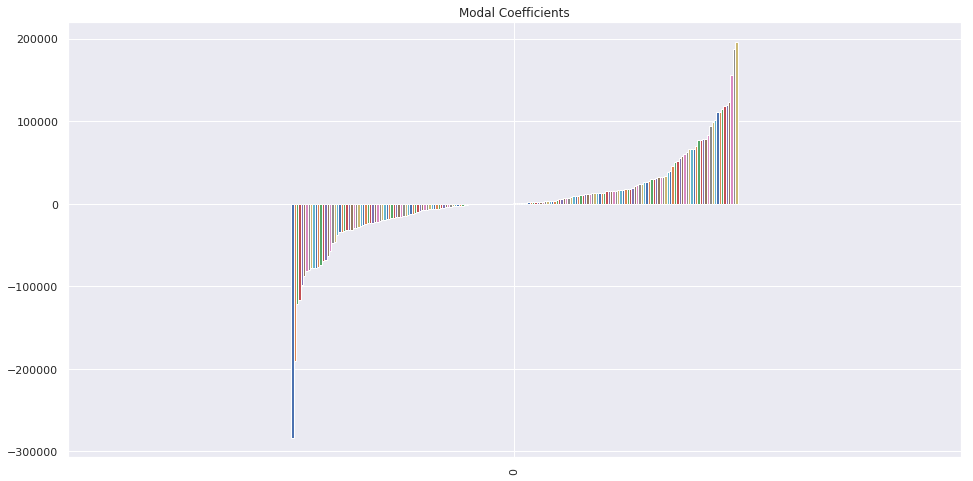

In [63]:
## training the model
from sklearn.linear_model import Lasso


lassoReg01 = Lasso(alpha=0.1, normalize=True)

lassoReg01.fit(X_train_2_scaled, y_train)

y_pred_lasso01 = lassoReg01.predict(X_test_2_scaled)

#calculating Rmse
RMSE_L01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso01))

# print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso01)))
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())

lasso_coef01 = pd.DataFrame(data=lassoReg01.coef_).T
lasso_coef01.columns = X_test_2.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))



In [64]:
lasso_coef01

,grade yr_built,sqft_living sqft_above,bathrooms yr_built,sqft_living yr_built,waterfront grade,grade sqft_lot15,sqft_living15,view yr_built,sqft_basement yr_built,grade sqft_living15,yr_built sqft_living15,view sqft_above,sqft_basement^2,sqft_above yr_old,bedrooms sqft_living,bedrooms yr_built,floors yr_built,bathrooms sqft_above,bathrooms^2,sqft_above sqft_living15,sqft_living sqft_lot15,sqft_above,view sqft_basement,sqft_living sqft_lot,condition yr_renovated,sqft_lot sqft_above,sqft_basement yr_old,yr_old,lat long,bedrooms sqft_basement,sqft_lot yr_old,bathrooms yr_old,bathrooms condition,yr_renovated lat,floors sqft_living15,condition,yr_renovated,yr_renovated yr_old,bathrooms sqft_lot,yr_built yr_old,bathrooms sqft_basement,condition^2,sqft_living condition,floors waterfront,floors sqft_lot15,waterfront yr_old,lat^2,bathrooms yr_renovated,sqft_lot15 yr_old,waterfront view,sqft_living sqft_living15,condition sqft_lot15,view yr_old,sqft_above yr_renovated,lat yr_old,floors yr_renovated,bathrooms floors,waterfront^2,bedrooms sqft_above,sqft_above yr_built,sqft_living15 sqft_lot15,condition grade,grade sqft_above,sqft_above sqft_basement,view yr_renovated,sqft_lot sqft_basement,bedrooms sqft_lot,sqft_lot waterfront,bedrooms yr_renovated,waterfront yr_renovated,sqft_lot yr_renovated,floors yr_old,waterfront sqft_lot15,sqft_lot view,bedrooms waterfront,sqft_lot lat,long^2,view sqft_lot15,lat sqft_lot15,bathrooms view,sqft_basement long,condition lat,sqft_basement lat,floors lat,condition long,floors long,long sqft_lot15,bedrooms condition,sqft_lot long,sqft_lot yr_built,yr_built long,yr_renovated long,bedrooms view,floors,sqft_living waterfront,sqft_basement sqft_lot15,sqft_basement,long yr_old,sqft_basement yr_renovated,sqft_living floors,condition yr_built,bedrooms long,long,floors view,yr_built yr_renovated,view sqft_living15,bedrooms^2,yr_renovated sqft_lot15,floors sqft_above,sqft_lot sqft_living15,bathrooms sqft_lot15,floors sqft_basement,sqft_lot^2,bathrooms long,bedrooms floors,sqft_lot15,view long,sqft_lot,yr_built lat,sqft_above long,waterfront yr_built,sqft_basement sqft_living15,bedrooms lat,lat sqft_living15,condition yr_old,sqft_lot sqft_lot15,waterfront condition,bedrooms sqft_living15,bathrooms waterfront,sqft_lot15^2,view lat,view condition,grade long,view^2,bedrooms sqft_lot15,sqft_lot condition,sqft_living long,view,waterfront long,waterfront sqft_basement,sqft_lot floors,bathrooms lat,long sqft_living15,floors^2,floors condition,bedrooms grade,bathrooms sqft_living15,sqft_above lat,bedrooms,bedrooms yr_old,waterfront lat,sqft_living yr_renovated,sqft_above sqft_lot15,floors grade,grade yr_renovated,sqft_living lat,condition sqft_basement,waterfront sqft_living15,condition sqft_above,yr_renovated sqft_living15,grade lat,sqft_living sqft_basement,bedrooms bathrooms,yr_renovated^2,waterfront,sqft_lot grade,grade,sqft_living yr_old,grade sqft_basement,lat,waterfront sqft_above,sqft_living view,yr_built,grade yr_old,bathrooms,bathrooms sqft_living,yr_built sqft_lot15,view grade,sqft_living15^2,yr_old^2,sqft_living15 yr_old,sqft_living,bathrooms grade,sqft_above^2,yr_built^2,condition sqft_living15,sqft_living^2,sqft_living grade,grade^2
0,-283110.104917,-190204.828965,-121408.665183,-116642.026136,-97939.471765,-87577.759209,-80933.216504,-80211.69578,-78284.148211,-77346.670371,-77339.071658,-76654.320836,-74327.037523,-68858.059126,-68131.088697,-63467.643932,-57817.461952,-47885.451011,-46052.857788,-38058.90429,-33956.709987,-33690.897257,-32537.996773,-32203.721536,-31859.298731,-31579.498373,-29020.022289,-28842.019295,-28014.58447,-27143.79731,-25373.379337,-24326.618313,-23629.439567,-23601.958092,-23114.753669,-22521.46775,-21606.209067,-20607.382393,-19514.847043,-19172.918766,-18976.039933,-18391.803483,-17790.921017,-17669.519319,-16412.829801,-16210.516626,-16193.30516,-14967.667074,-14640.6136,-13491.86142,-12963.315923,-11857.062424,-10859.78499,-9515.097757,-8625.527009,-8036.04916,-7735.15494,-7

## Practice 

Now  try to rerun these models with different regularization rates to try and figure out which will help to achieve  the lowes  RMSE on the test set

In [65]:
#print out a comaprison of the  your Lasso RMSEs

print(test_2_rmse, RMSE_L01, RMSE_L1, RMSE_L5)

NameError: name 'RMSE_L1' is not defined

In [ ]:
lasso_coefs =  pd.concat([lasso_coef01, lasso_coef1, lasso_coef5], sort=True)

In [ ]:
lasso_coefs.abs().sum(axis=1)

Finally to end this, let’s summarize what we have learnt so far:

1. Cost function of Ridge and Lasso regression and importance of regularization term.
2. Went through some examples using simple data-sets to understand Linear regression as a limiting case for both Lasso and Ridge regression.
3. Understoodd why Lasso regression can lead to feature selection whereas Ridge can only shrink coefficients close to zero.